In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 读取数据
train = pd.read_csv('/root/autodl-fs/data/train_revise+45缩减到100特征 数量1000个 去掉三列和Name.csv')

# 分离特征和标签
X = train.drop(['senolytic'], axis=1)
y = train['senolytic']

# 特征标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# 定义MLP模型
mlp = MLPClassifier(max_iter=300, random_state=42)

# 设置参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# 使用GridSearchCV进行超参数调优
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 获取最佳参数
best_mlp = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'solver': 'sgd'}


/root/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# 使用最佳参数的MLP模型在测试集上预测
y_pred = best_mlp.predict(X_test)
y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]

# 计算评价指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 计算PR曲线并计算PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("PR AUC Score:", pr_auc)

Accuracy: 0.865
Precision: 0.625
Recall: 0.45454545454545453
F1 Score: 0.5263157894736842
ROC AUC Score: 0.8314280529849392
PR AUC Score: 0.5702941672374598


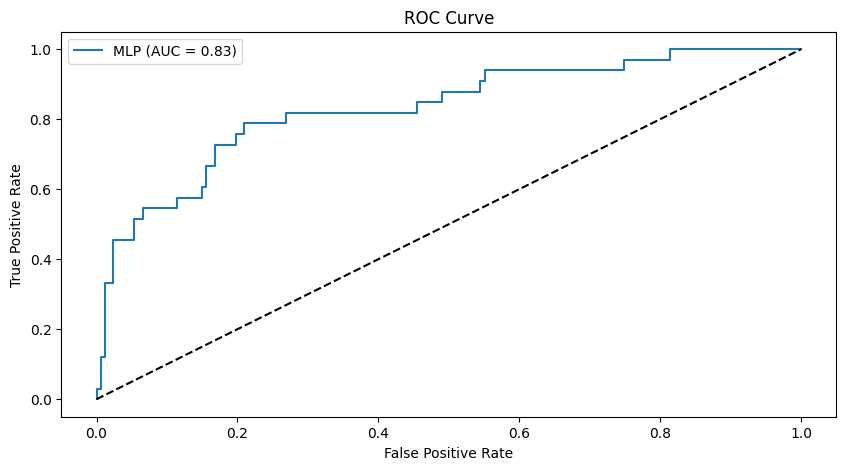

In [5]:
# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

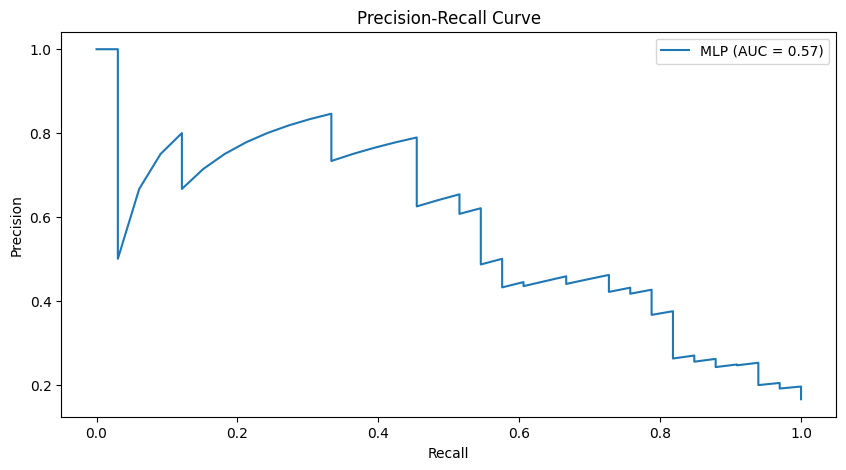

In [6]:
# 绘制PR曲线并计算AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)
plt.figure(figsize=(10, 5))
plt.plot(recall_vals, precision_vals, label=f'MLP (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()